In [2]:
#Evaluating the linear regression model

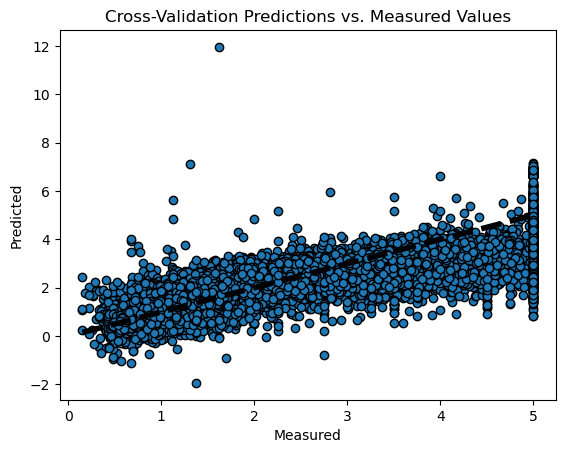

In [10]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

# Load the California housing dataset
california = datasets.fetch_california_housing()

# Initialize the Linear Regression model
lr = LinearRegression()

# Fit the model to the data
lr.fit(california.data, california.target)

# Perform cross-validation predictions
predictions_cv = cross_val_predict(lr, california.data, california.target, cv=10)

# Plotting the results
plt.scatter(california.target, predictions_cv, edgecolors=(0, 0, 0))
plt.plot([california.target.min(), california.target.max()], [california.target.min(), california.target.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Cross-Validation Predictions vs. Measured Values')
plt.show()


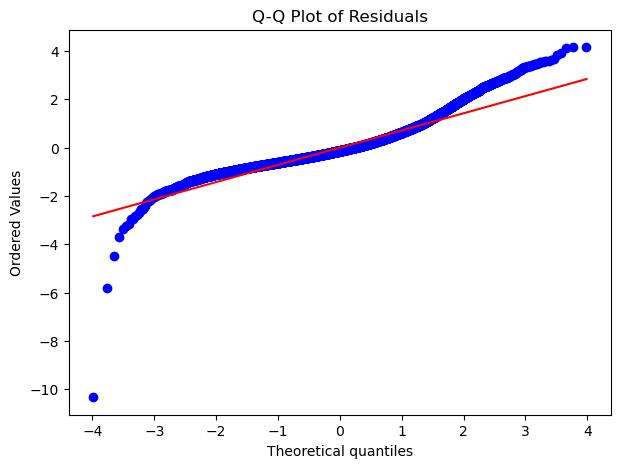

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from scipy.stats import probplot

# Load the California housing dataset
california = datasets.fetch_california_housing()

# Initialize the Linear Regression model
lr = LinearRegression()

# Perform cross-validation predictions
predictions_cv = cross_val_predict(lr, california.data, california.target, cv=10)

# Calculate residuals
residuals = california.target - predictions_cv

# Plotting the Q-Q plot
f = plt.figure(figsize=(7, 5))
ax = f.add_subplot(111)
tuple_out = probplot(residuals, plot=ax)
plt.title('Q-Q Plot of Residuals')
plt.show()


In [20]:
tuple_out[1]

(0.7123629083227698, 0.000707640807784778, 0.959541640230893)

In [22]:
def MSE(target, predictions):
    squared_deviation = np.power(target - predictions, 2)
    return np.mean(squared_deviation)

Mean Squared Error: 0.5509524296956646


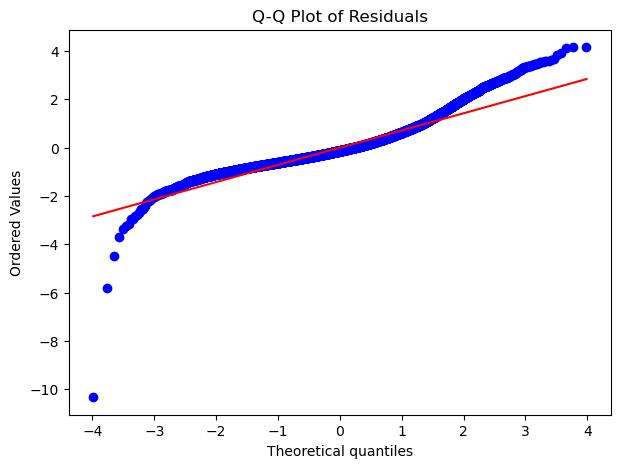

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from scipy.stats import probplot

# Load the California housing dataset
california = datasets.fetch_california_housing()

# Initialize the Linear Regression model
lr = LinearRegression()

# Perform cross-validation predictions
predictions_cv = cross_val_predict(lr, california.data, california.target, cv=10)

# Calculate MSE
mse = mean_squared_error(california.target, predictions_cv)
print(f'Mean Squared Error: {mse}')

# Calculate residuals
residuals = california.target - predictions_cv

# Plotting the Q-Q plot
f = plt.figure(figsize=(7, 5))
ax = f.add_subplot(111)
tuple_out = probplot(residuals, plot=ax)
plt.title('Q-Q Plot of Residuals')
plt.show()


Mean Squared Error: 0.5509524296956646
Mean Absolute Deviation: 0.5445214393268037


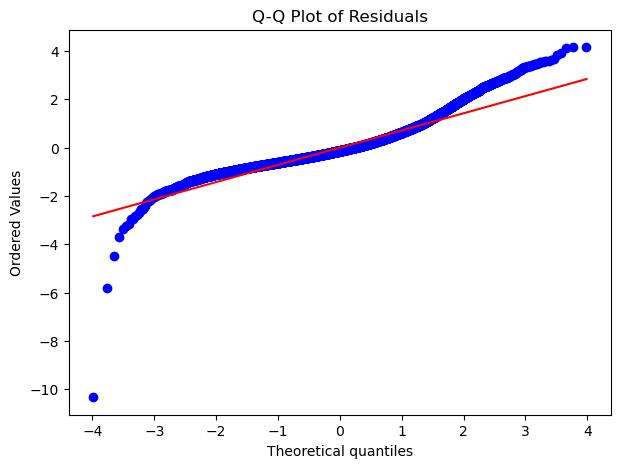

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from scipy.stats import probplot

# Load the California housing dataset
california = datasets.fetch_california_housing()

# Initialize the Linear Regression model
lr = LinearRegression()

# Perform cross-validation predictions
predictions_cv = cross_val_predict(lr, california.data, california.target, cv=10)

# Calculate MSE
mse = mean_squared_error(california.target, predictions_cv)
print(f'Mean Squared Error: {mse}')

# Define MAD function
def MAD(target, predictions):
    absolute_deviation = np.abs(target - predictions)
    return np.mean(absolute_deviation)

# Calculate MAD
mad = MAD(california.target, predictions_cv)
print(f'Mean Absolute Deviation: {mad}')

# Calculate residuals
residuals = california.target - predictions_cv

# Plotting the Q-Q plot
f = plt.figure(figsize=(7, 5))
ax = f.add_subplot(111)
tuple_out = probplot(residuals, plot=ax)
plt.title('Q-Q Plot of Residuals')
plt.show()


Mean Absolute Error (MAE): 0.5445214393268037
Mean Squared Error (MSE): 0.5509524296956646


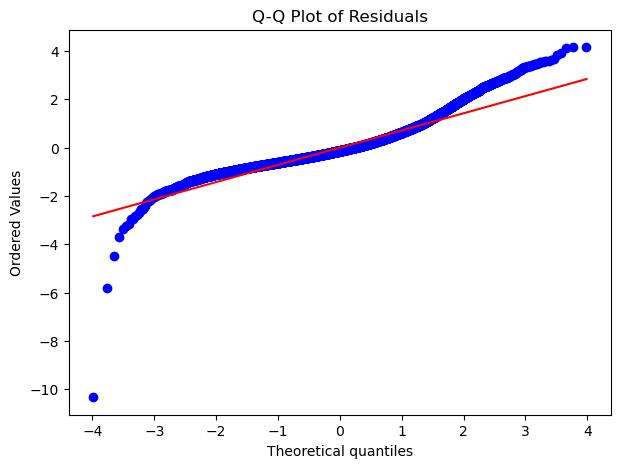

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import probplot

# Load the California housing dataset
california = datasets.fetch_california_housing()

# Initialize the Linear Regression model
lr = LinearRegression()

# Perform cross-validation predictions
predictions_cv = cross_val_predict(lr, california.data, california.target, cv=10)

# Calculate and print MAE and MSE
mae = mean_absolute_error(california.target, predictions_cv)
mse = mean_squared_error(california.target, predictions_cv)
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)

# Calculate residuals
residuals = california.target - predictions_cv

# Plotting the Q-Q plot
f = plt.figure(figsize=(7, 5))
ax = f.add_subplot(111)
tuple_out = probplot(residuals, plot=ax)
plt.title('Q-Q Plot of Residuals')
plt.show()


In [42]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LinearRegression

# Load the California housing dataset
california = datasets.fetch_california_housing()

# Initialize the Linear Regression model
lr = LinearRegression()

# Bootstrap resampling
n_bootstraps = 1000
len_california = len(california.target)
subsample_size = int(0.5 * len_california)

# Function to generate subsample indices
subsample = lambda: np.random.choice(np.arange(0, len_california), size=subsample_size)
coefs = np.ones(n_bootstraps)  # Pre-allocate the space for the coefficients

# Perform bootstrap resampling
for i in range(n_bootstraps):
    subsample_idx = subsample()
    subsample_X = california.data[subsample_idx]
    subsample_y = california.target[subsample_idx]
    lr.fit(subsample_X, subsample_y)
    coefs[i] = lr.coef_[0]

# Display results
print(f'Bootstrap estimated coefficients (first feature): {coefs[:10]}')  # Display the first 10 estimated coefficients


Bootstrap estimated coefficients (first feature): [0.42401465 0.41897921 0.44720846 0.41506233 0.43356794 0.42679394
 0.42803755 0.44741679 0.45071709 0.44727453]


Text(0.5, 1.0, 'Histogram of the lr.coef_[0].')

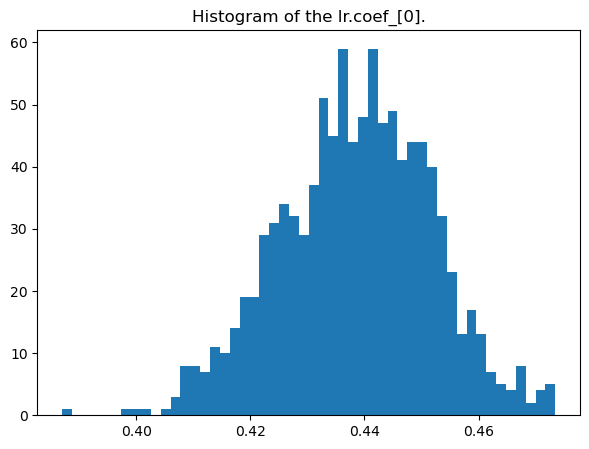

In [44]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(7, 5))
ax = f.add_subplot(111)
ax.hist(coefs, bins=50)
ax.set_title("Histogram of the lr.coef_[0].")

In [46]:
np.percentile(coefs, [2.5, 97.5])

array([0.41193458, 0.46442257])